## Logisic Regression Code Implementation from Scratch

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Sigmoid Function

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### Loss Function

In [4]:
def log_loss(y, y_hat):
    return -y*np.log(y_hat) - (1-y)*np.log(1-y_hat)

#### Predict Fucntion

In [6]:
def predict(X, W):
    '''
    X : (n,d) it'a input matrix
    W : (d, 1) all the weights
    '''
    z = np.dot(X,W)
    return sigmoid(z)

#### Error Function

In [8]:
def error(X, y, W):

    y_hat = predict(X, W)
    
    err = np.mean(-y*np.log(y_hat) - (1-y)*np.log(1-y_hat))
    
    return err

#### Gradient descent code

In [9]:
def gradient(X, y, W):
    y_hat = predict(X, W)
    grad = np.dot(X.T , y_hat - y )

    return grad/len(X)

In [10]:
def gradient_descent(X, Y, n_itr = 400, eta = 0.1):
    weights =  np.random.randn(X.shape[1],1)
    error_list = []

    for i in range(n_itr):
        e = error(X,Y, weights)
        error_list.append(e)
        grad = gradient(X, Y, weights)
        weights = weights - eta*grad

    return weights.round(2), error_list

#### Creating Dummy Data

In [11]:
from sklearn.datasets import make_classification

In [12]:
X, y = make_classification(n_samples=500, 
                           n_features=2, 
                           n_informative=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=14
                          )

In [13]:
X.shape, y.shape

((500, 2), (500,))

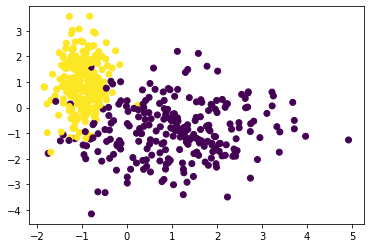

In [14]:
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

In [15]:
y  = y.reshape(-1, 1)
y.shape

(500, 1)

In [16]:
ones = np.ones((len(X), 1))
X_new = np.hstack((ones, X))
X_new.shape

(500, 3)

In [17]:
X_new

array([[ 1.        , -0.89588599,  0.30746053],
       [ 1.        , -1.10138028,  0.95886945],
       [ 1.        ,  0.13024742, -1.94959026],
       ...,
       [ 1.        ,  2.32103424, -0.84023178],
       [ 1.        , -1.18055547,  1.17763449],
       [ 1.        , -0.55346507,  0.48572126]])

In [18]:
opt_weights, error_list = gradient_descent(X_new, y)

In [19]:
opt_weights.shape

(3, 1)

In [20]:
opt_weights

array([[-0.93],
       [-2.71],
       [ 1.59]])

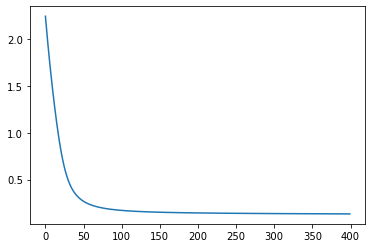

In [21]:
plt.plot(error_list)

### Predicting

In [23]:
y_hat = predict(X_new, opt_weights).round(2)

In [24]:
y_hat.shape

(500, 1)

In [27]:
y_hat[:5]

array([[0.88],
       [0.97],
       [0.01],
       [0.  ],
       [0.  ]])

In [28]:
y_pred = y_hat.round()

In [29]:
y_pred[:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

### Visualise the best fit line

In [32]:
w0 , w1, w2  = opt_weights

In [36]:
x1 = np.array([-2,2])

x2 = -(w0 + w1*x1)/w2

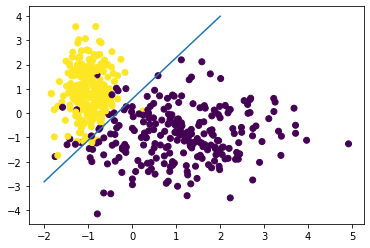

In [38]:
plt.plot(x1,x2)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

#### Performance of model

In [44]:
Accuracy = round((y_pred == y).sum()/len(y),2)

In [45]:
Accuracy

0.96